<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Sklearn_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Non parameteric supervised learning method used for regression and classification.
It uses simple decision rules


+ve :

Simple to understand, interpret, visualize
No data prep required ( except missing value treatment)
Cost of predicting is log(N) where N is number of training examples.
Able to handle both numerical and categorical variables
Can be used for Multi-output problem
White box model - Use ifelse rules
Possible to validate a model using statistical tests.
Performs well even if its assumption are violated by true model


-ve:
Can create over-complex decision tree leading to overfitting. Can be mitigated by
number of samples in a tree / maximum depth.
If data is rotated then Decision Tree may come out to be completely different.
Partial DT algo is based on greedy approach cannot find an optimial decision tree.
DT can create a biased tree, if some class dominates. Its important to balance before fitting 
decision trees.
"""

Classification

In [0]:
"""
DecisionTreeClassifier is a class capable of performing multi-class 
classification on a dataset.


"""

from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target


In [0]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.444\nsamples = 3\nvalue

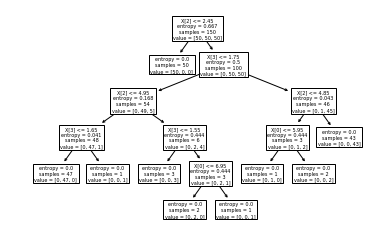

In [0]:
tree.plot_tree(clf)

In [0]:
!pip install graphviz

In [0]:
import graphviz

In [0]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)

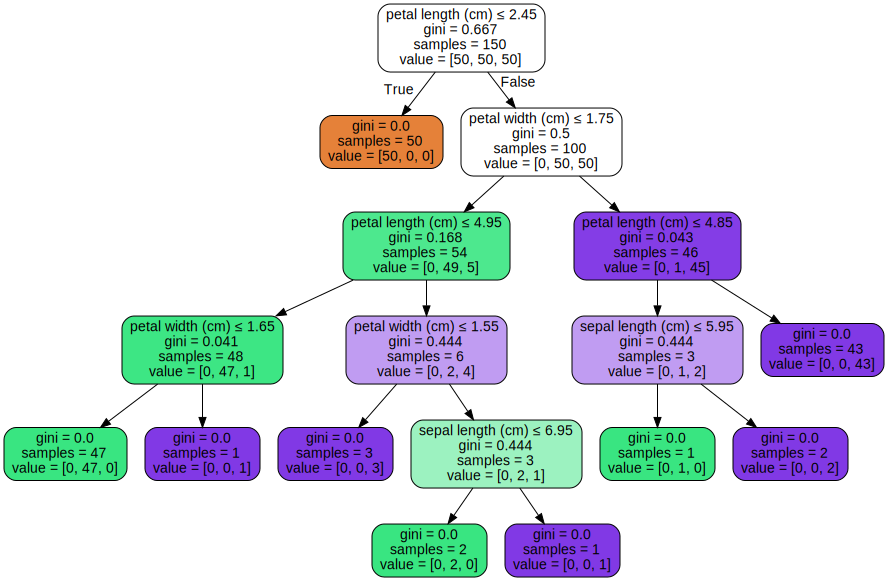

In [0]:
graph

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

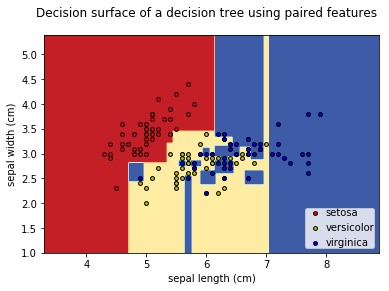

<Figure size 432x288 with 0 Axes>

In [0]:
X_dec = X[:, [0,1]]
#plt.subplot(2, 3,  1)
n_classes = 3
x_min, x_max = X_dec[:, 0].min() - 1, X_dec[:, 0].max() + 1
y_min, y_max = X_dec[:, 1].min() - 1, X_dec[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
clf = tree.DecisionTreeClassifier().fit(X_dec, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

for i, color in zip(range(n_classes), "ryb"):
  idx = np.where(y == i)
  plt.scatter(X_dec[idx, 0], X_dec[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
  
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()

  

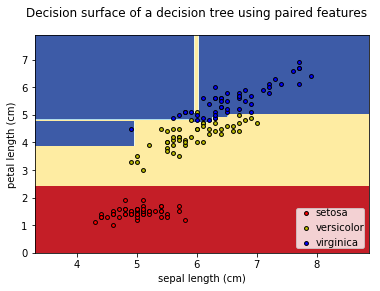

<Figure size 432x288 with 0 Axes>

In [23]:
X_dec = X[:, [0,2]]
#plt.subplot(2, 3,  1)
n_classes = 3
x_min, x_max = X_dec[:, 0].min() - 1, X_dec[:, 0].max() + 1
y_min, y_max = X_dec[:, 1].min() - 1, X_dec[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
clf = tree.DecisionTreeClassifier().fit(X_dec, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

for i, color in zip(range(n_classes), "ryb"):
  idx = np.where(y == i)
  plt.scatter(X_dec[idx, 0], X_dec[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
  
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
plt.show()


Regression

In [0]:
"""
Multioutput problem:
Here Y is 2 dimension [n_samples, n_output]

If there is no correlation between outputs then building n_output Decision Tree makes sense
However, if the outputs are somewhat correlated then build a single model capable of predicting simultaneously all n outputs. 

"""

In [25]:
rng = np.random.RandomState(1)

X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
X.shape
"""
X
array([[-99.97712504],
       [-99.42593459],
       [-96.34234453],
       [-96.12660843],
       [-94.52248136]])
"""

(100, 1)

In [0]:
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y.shape
y[::3, :] += (0.5 - rng.rand(34, 2)) # step 3 rows

"""
y
array([[ 1.65234252,  2.6719597 ],
       [ 2.80694332,  1.41091233],
       [-2.72043225, -1.57125834],
       [-2.99372396, -0.95248164],
       [-0.85218806,  3.02380223],
       [ 2.77497039, -1.47280132],
       [-2.79534903, -1.43374621]])

"""

In [47]:
y[::3, :].shape

(34, 2)

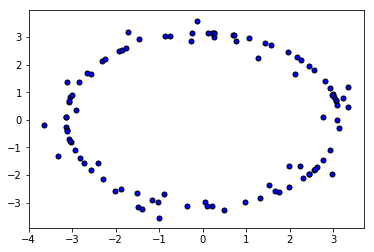

In [55]:
plt.scatter(y[:, 0], y[:, 1], c="blue", s=25,
            edgecolor="black", label="data")

In [0]:
regr_1 = tree.DecisionTreeRegressor(max_depth=8).fit(X, y)

y_pred_1 = regr_1.predict(X)

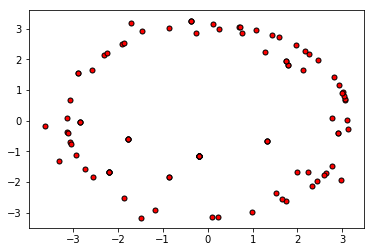

In [51]:
plt.scatter(y_pred_1[:, 0], y_pred_1[:, 1], c="red", s=25, edgecolor="black", label="data")

In [0]:
#Overfit
regr_2 = tree.DecisionTreeRegressor(max_depth=100).fit(X, y)
y_pred_2 = regr_2.predict(X)

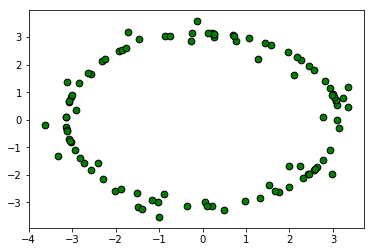

In [54]:
plt.scatter(y_pred_2[:, 0], y_pred_2[:, 1], c="green", s=45, edgecolor="black", label="data")

In [0]:
"""
Complexity :

Construction = O(n_samples X n_features X log(n_samples))
QueryTime = O(n_samples)

Tips:

- DT tends to overfit when given large number of parameters. Right ratio of number of features / number of samples is imp
- Performing PCA is good in finding features that are discriminative
- Understanding DT structure means getting insight on feature importance
- Use max_depth to control tree from overfitting
- min_samples_split or min_samples_leaf help in avoiding overfitting
- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf = 5 to begin with means each leaf has a minimum size
- Balancing the tree prevents biasing DT for a certain class. sample_weight: by normalizing the sum of the sample weights.

"""